<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Oct20-21/Tarea_DESI_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando el notebook https://colab.research.google.com/drive/1Ht-in9PN4glCRIiXOJhzAFjFD8vwb3c5?usp=sharing, ejecutalo y realiza las actividades que se marcan como ejercicio.

Nota que en el notebook las instrucciones se realizan para 1 solo archivo de los que puedes encontrar en teams, pero una vez que tu código funcione para 1 archivo deberás intentar generalizarlo para que funcione colectando la información de todos los archivos disponibles.

In [46]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.decomposition import PCA

In [8]:
# Habrimos uno de los archivos que contienen los espectros desde Drive
drive.mount('/content/drive')
spec_file = fits.open("/content/drive/MyDrive/Machine Learning/Data/coadd-sv3-dark-25971.fits")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Mostramos el contenido del documento organizado en diferentes HDU (Header + Data Units)
spec_file.info()

Filename: /content/drive/MyDrive/Machine Learning/Data/coadd-sv3-dark-25971.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   57R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   8866R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 57)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 57)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 57)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 57)   float32   
  8  R_WAVELENGTH    1 ImageHDU        

In [10]:
# El FIBERMAP HDU contiene informacion acerca del objeto que fue observado, en
# en particular estaremos interesados en el TARGETID, el identificar unico
# asignado a cada objeto observado en DESI.

fibermap = Table(spec_file["FIBERMAP"].data)
fibermap

<Table length=57>
     TARGETID     COADD_FIBERSTATUS ... STD_FIBER_DEC MEAN_PSF_TO_FIBER_SPECFLUX
      int64             int32       ...    float32             float32          
----------------- ----------------- ... ------------- --------------------------
39627842761265821                 0 ...   0.034879677                      0.789
39627842765456633                 0 ...   0.067801826                      0.789
39627836725659403                 0 ...      17.28124                 0.33814287
39627836729853395                 0 ...    0.10401312                      0.789
39627830685860246                 0 ...    0.03298166                  0.7820331
39627830685860390                 0 ...  0.0007508004                      0.789
39627836721467245                 0 ...    0.07693039                      0.789
39627830685861241                 0 ...     32.521576                  0.6455455
39627830685861137                 0 ...     17.188925                  0.6676154
39627842765458625                 0 ...     4.0723433                  0.6455455
              ...               ... ...           ...                        ...
39627824646064673                 0 ...   0.023290947                      0.789
39627818606267623                 0 ...   0.041298192                      0.789
39627824641871361                 0 ...   0.032694608                      0.789
39627824646064297                 0 ...  0.0054123034                      0.789
39627824641871446                 0 ...           0.0                 0.78535163
39627824641872210                 0 ...           0.0                      0.789
39627824641871442                 0 ...           0.0                  0.7653098
39627824637676592                 0 ...           0.0                      0.789
39627830677474244                 0 ...           0.0                  0.7849254
39627830677472695                 0 ...           0.0                      0.789

In [ ]:
# Para este archivo tenemos el espectro para 57 quasars.

In [11]:
# Guardamos los TARGETIDs en una variable para usarlos despues.
tids = fibermap["TARGETID"]

<ipython-input-26-40badccc02f7>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(bwave, bflux[i], 'k', color='black')


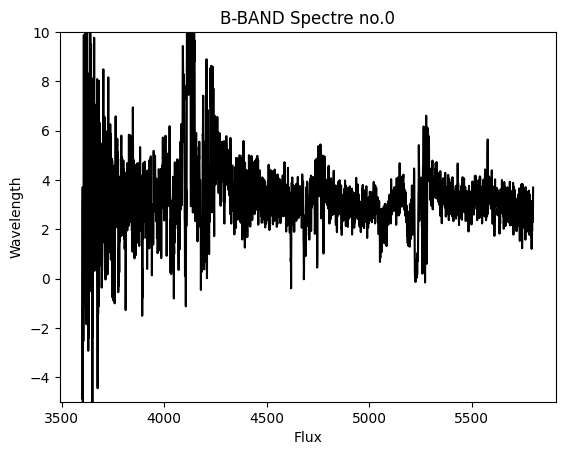

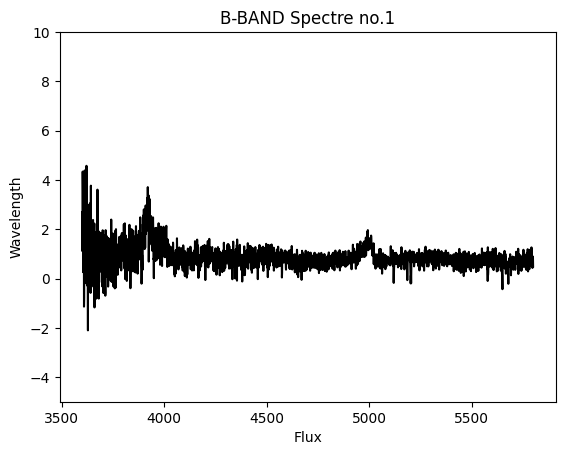

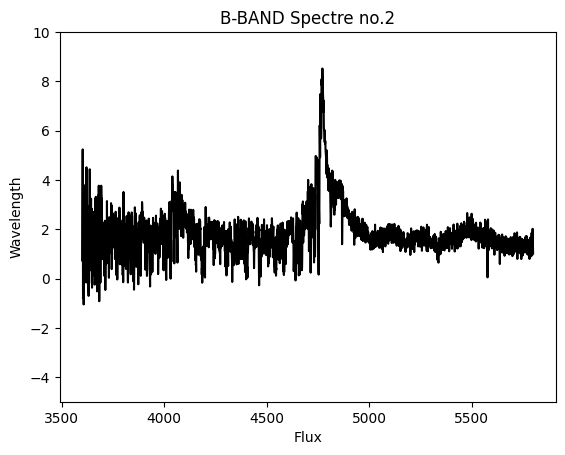

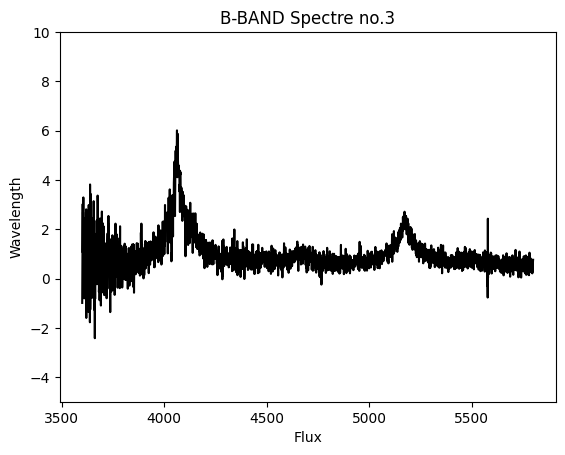

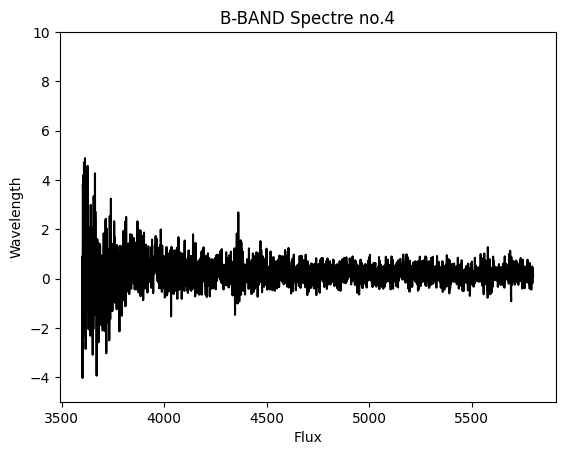

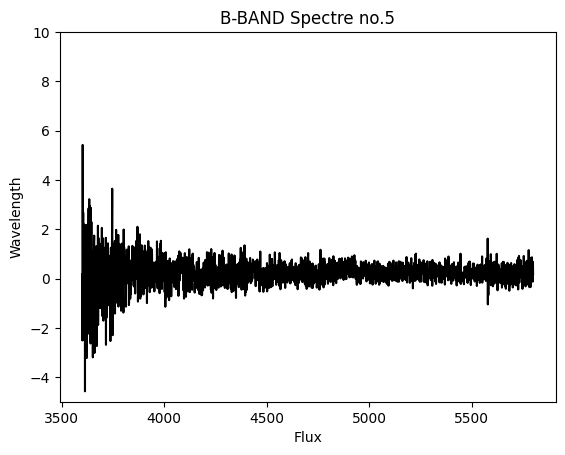

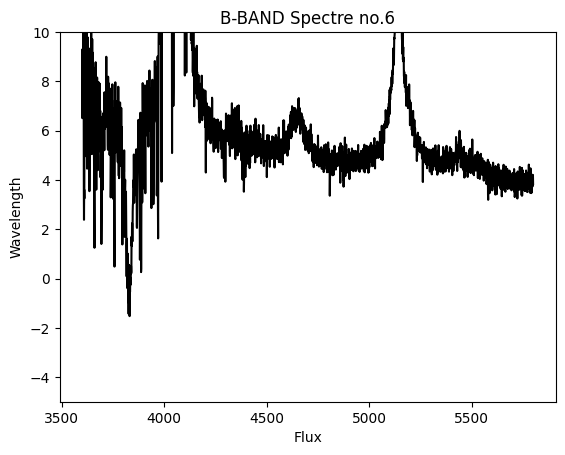

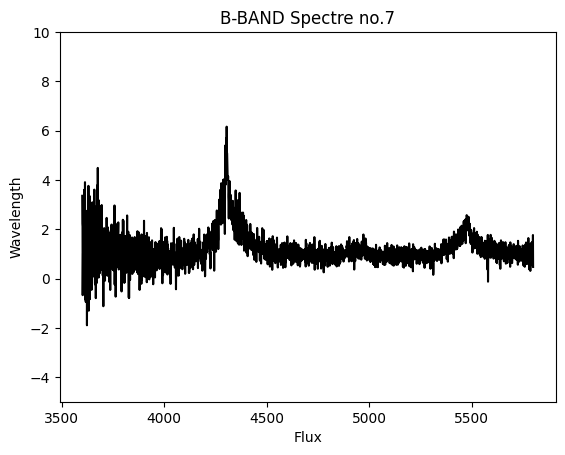

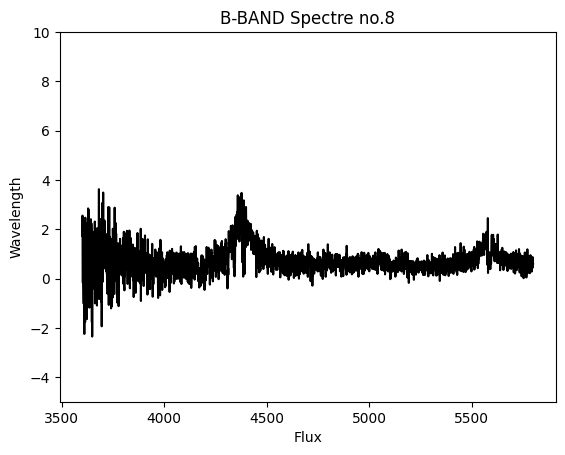

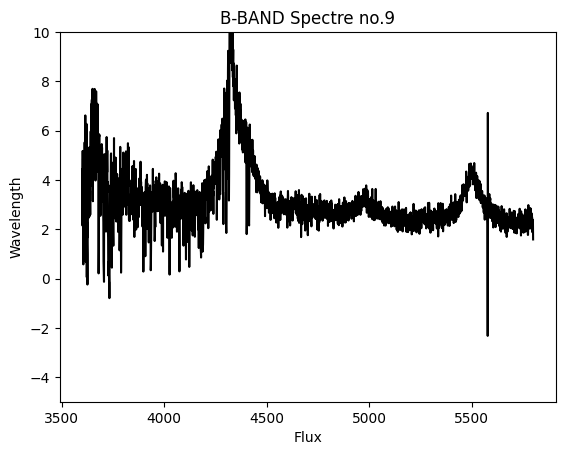

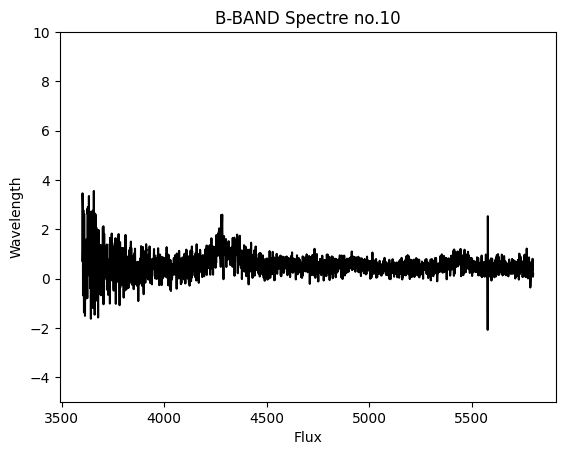

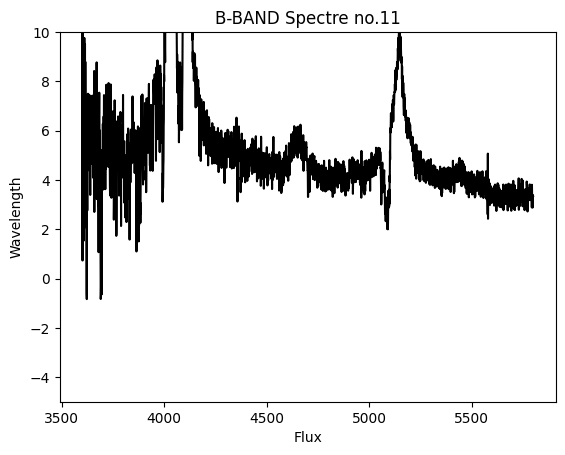

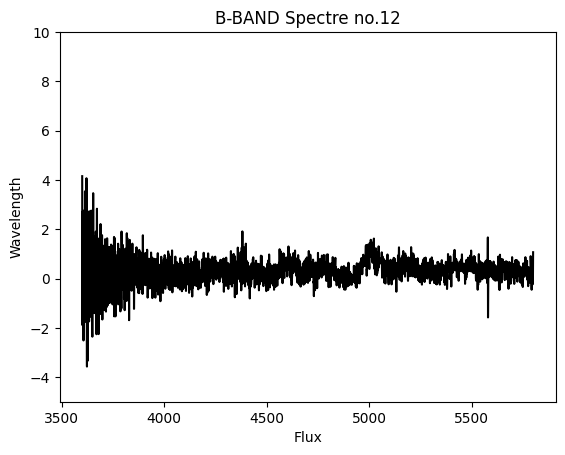

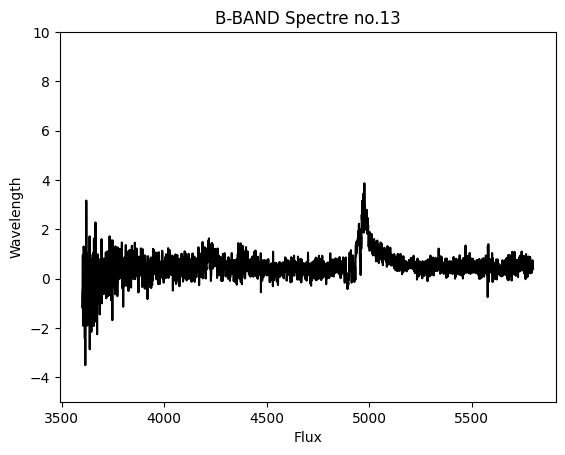

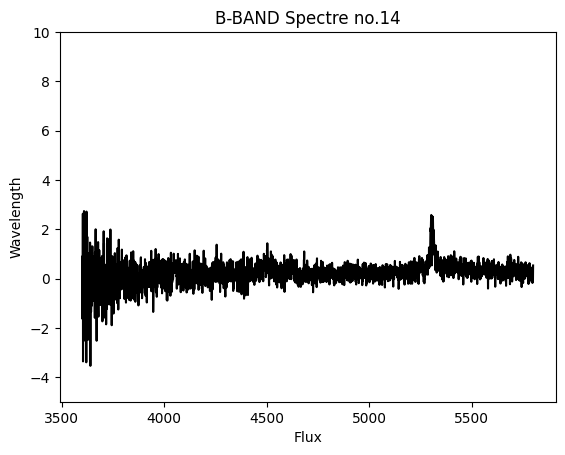

In [26]:
# Ahora, el espectro que DESI observo para cada quasar, es decir, para cada
# TARGETID es guardado en HDUs llamados B_FLUX, R_FLUX, ZFLUX.

# Y la longitudes de onda son B_WAVELENGTH, R_WAVELENGTH, Z_WAVELENGTH HDUs
# respectivamente.

# B, R, Z corresponde a las diferentes bandas de los espectrografos de DESI.

# Accediendo al espectro, solo para la banda B, graficandolo.

bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

# Graficamos los primeros 15
for i in range(15):
  plt.plot(bwave, bflux[i], 'k', color='black')
  plt.title(f"B-BAND Spectre no.{i}",)
  plt.ylabel("Wavelength")
  plt.xlabel("Flux")
  plt.ylim(-5,10)
  plt.show()

Exercise: Use the PCA analysis to find the principal components that corresponds for the spectra we have. Do it first for the spectra in only one file, then combine the data from different files and make the PCA again.

In [ ]:
# En principio todos estos espectros corresponden al espectro de cuasares
# y corrimiento al rojo por encima de 1.8, necesitamos leer una tabla mas
# para conocer el corrimiento al rojo que DESI midio para cada uno de los
# objetos que tenemos.

In [28]:
# En este caso leemos directamente el catalogo de corrimiento al rojo como tabla
zcat = Table.read("/content/drive/MyDrive/Machine Learning/Data/zall-pix-edr-vac.fits", hdu=1)

# Mostramos el catalogo de corrimento al rojo
zcat

<Table length=2451325>
     TARGETID      SURVEY PROGRAM ...    MAX_MJD     FIRSTNIGHT LASTNIGHT
      int64        bytes7  bytes6 ...    float64       int32      int32  
------------------ ------ ------- ... -------------- ---------- ---------
 39628473198708395    cmx   other ... 59200.12381137   20201216  20201216
 39628473198709499    cmx   other ... 59200.12381137   20201216  20201216
 39628473198710139    cmx   other ... 59200.12381137   20201216  20201216
 39628473198710603    cmx   other ... 59200.12381137   20201216  20201216
 39628473198711006    cmx   other ... 59200.12381137   20201216  20201216
 39628473198711342    cmx   other ... 59200.12381137   20201216  20201216
 39628473198711925    cmx   other ... 59200.12381137   20201216  20201216
 39628473202901028    cmx   other ... 59200.12381137   20201216  20201216
 39628473202901626    cmx   other ... 59200.12381137   20201216  20201216
 39628473202901945    cmx   other ... 59200.12381137   20201216  20201216
               ...    ...     ... ...            ...        ...       ...
616094220515541567    sv3    dark ...  59316.4783506   20210411  20210411
616094220515541579    sv3    dark ... 59317.49939296   20210412  20210412
616094220515541580    sv3    dark ...  59316.4783506   20210411  20210411
616094220515541610    sv3    dark ... 59311.42777604   20210406  20210406
616094220515541672    sv3    dark ... 59311.42777604   20210406  20210406
616094220515541854    sv3    dark ... 59311.42777604   20210406  20210406
616094220519735351    sv3    dark ... 59324.44062717   20210419  20210419
616094220519735611    sv3    dark ... 59312.47978586   20210407  20210407
616094220523929606    sv3    dark ... 59314.39992879   20210409  20210409
616094222814020204    sv3    dark ... 59324.44062716   20210419  20210419

In [29]:
# De la tabla zcat, lo mas importante que estaremos utilizando es el
# TARGETID, el SURVEY, el SPECTYPE y el redshift Z.
# Reduscamos la tabla solo a estas variables.
zcat = zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat

<Table length=2451325>
     TARGETID      SURVEY SPECTYPE           Z           
      int64        bytes7  bytes6         float64        
------------------ ------ -------- ----------------------
 39628473198708395    cmx     STAR -0.0019956912923479522
 39628473198709499    cmx   GALAXY      0.797663336968385
 39628473198710139    cmx   GALAXY       1.33150513847107
 39628473198710603    cmx   GALAXY      0.804205874112604
 39628473198711006    cmx     STAR -6.607473910190775e-05
 39628473198711342    cmx     STAR -0.0019956912923479522
 39628473198711925    cmx   GALAXY    0.39072440164450306
 39628473202901028    cmx   GALAXY     0.6657999257489294
 39628473202901626    cmx   GALAXY    0.32842015807005115
 39628473202901945    cmx   GALAXY    0.35499256923949984
               ...    ...      ...                    ...
616094220515541567    sv3     STAR -0.0019956912923479522
616094220515541579    sv3   GALAXY    0.14669471589166502
616094220515541580    sv3     STAR -0.0019956912923479522
616094220515541610    sv3   GALAXY      1.625973033373096
616094220515541672    sv3   GALAXY     1.5703204313161931
616094220515541854    sv3   GALAXY     1.1443494269516812
616094220519735351    sv3   GALAXY     0.9811496704970901
616094220519735611    sv3   GALAXY     1.6382227753303393
616094220523929606    sv3     STAR -0.0019956912923479522
616094222814020204    sv3   GALAXY     0.6903148870877507

In [30]:
# Ahora reduzcamos la tabla donde solo contenga los elementos de los TARGETID
# que nosotros identificamos anteriormente en nuestro documento de espectros
# Para esto necesitamos que estos documentos correspondan al SURVEY=sv3
# Como se indica en el nombre del documento.
# Entonces hagamos un filtro para sv3
mask = zcat["SURVEY"]=='sv3'
zcat = zcat[mask]
zcat

<Table length=1409874>
     TARGETID      SURVEY SPECTYPE           Z           
      int64        bytes7  bytes6         float64        
------------------ ------ -------- ----------------------
616088497761027054    sv3   GALAXY     0.8047145429076951
616088497765221242    sv3     STAR -0.0019956912923479522
616088497765221281    sv3   GALAXY     0.5507557262875663
616088497765221450    sv3   GALAXY    0.07358486749516376
616088497765221501    sv3   GALAXY      0.719444701817346
616088497769415698    sv3   GALAXY   0.039215908005138314
616088497773610181    sv3   GALAXY     0.2864062436603106
616088497819747217    sv3   GALAXY     0.4960341488452893
616088497819747383    sv3   GALAXY     1.0968576187793935
616088497819747391    sv3   GALAXY     1.4685896296467176
               ...    ...      ...                    ...
616094220515541567    sv3     STAR -0.0019956912923479522
616094220515541579    sv3   GALAXY    0.14669471589166502
616094220515541580    sv3     STAR -0.0019956912923479522
616094220515541610    sv3   GALAXY      1.625973033373096
616094220515541672    sv3   GALAXY     1.5703204313161931
616094220515541854    sv3   GALAXY     1.1443494269516812
616094220519735351    sv3   GALAXY     0.9811496704970901
616094220519735611    sv3   GALAXY     1.6382227753303393
616094220523929606    sv3     STAR -0.0019956912923479522
616094222814020204    sv3   GALAXY     0.6903148870877507

In [31]:
# Ahora solo mantengamos los elementos correspondientes a los TARGETIDs que
# tenemos en nuestro spectrafile
mask = np.in1d(zcat["TARGETID"],tids)
zcat = zcat[mask]
zcat

<Table length=57>
     TARGETID     SURVEY SPECTYPE         Z         
      int64       bytes7  bytes6       float64      
----------------- ------ -------- ------------------
39627818606267623    sv3      QSO  2.262031715372346
39627824637676592    sv3      QSO 2.7744183063963486
39627824641870857    sv3      QSO  2.341903739785506
39627824641871034    sv3      QSO 2.8018660582166537
39627824641871361    sv3      QSO  2.246344871753892
39627824641871442    sv3      QSO 2.5122815198825026
39627824641871446    sv3      QSO 2.5163587417485864
39627824641872210    sv3      QSO 2.4848793311414297
39627824641872308    sv3      QSO  2.106171198297492
39627824641872739    sv3      QSO 1.2847690615394056
              ...    ...      ...                ...
39627842761266009    sv3      QSO  2.385432715371992
39627842765456633    sv3      QSO  2.223376013773048
39627842765456989    sv3      QSO 2.4151660208847363
39627842765457323    sv3      QSO 2.2062131511449863
39627842765458132    sv3      QSO 3.5754904265115988
39627842765458222    sv3      QSO 2.5074867244733454
39627842765458625    sv3      QSO  2.552436701119649
39627842769649763    sv3      QSO 2.3212266368273626
39627842769649870    sv3      QSO  2.329025712701886
39627842769650293    sv3      QSO 2.6828459860101384

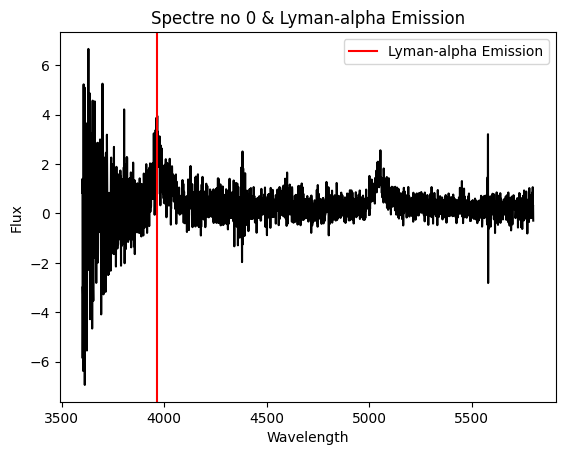

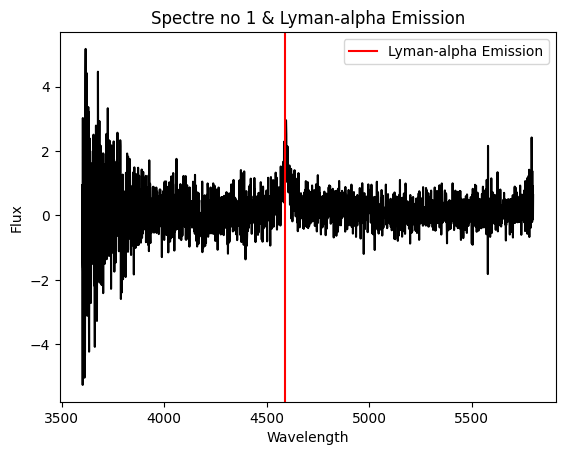

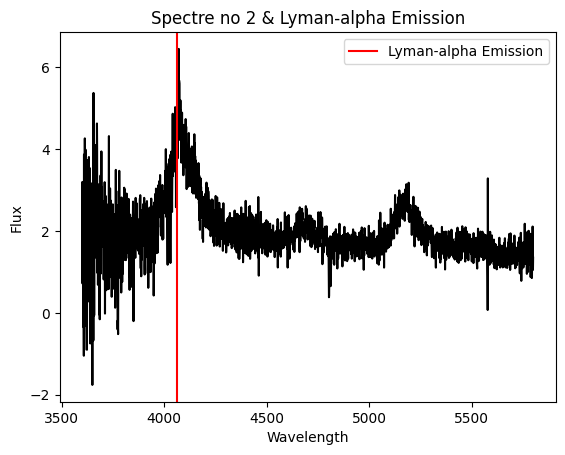

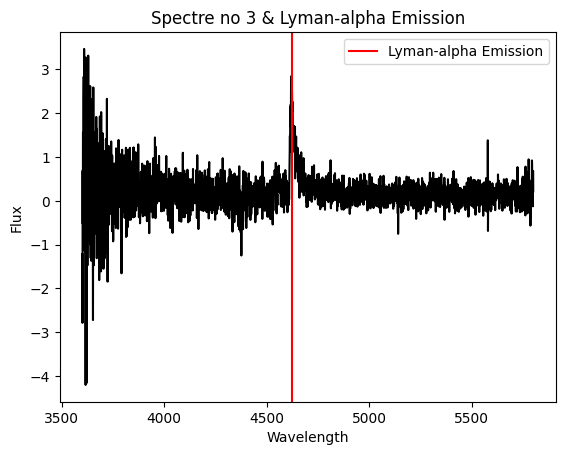

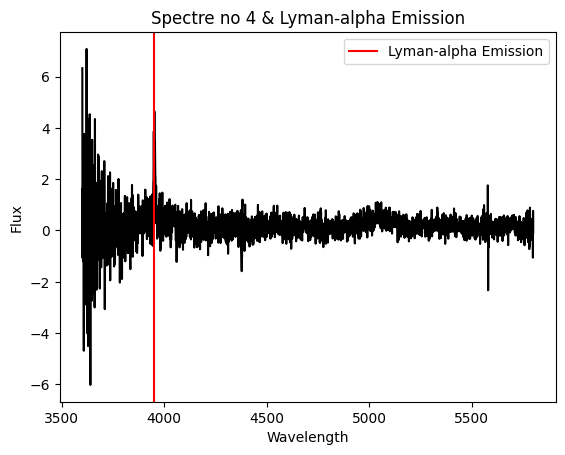

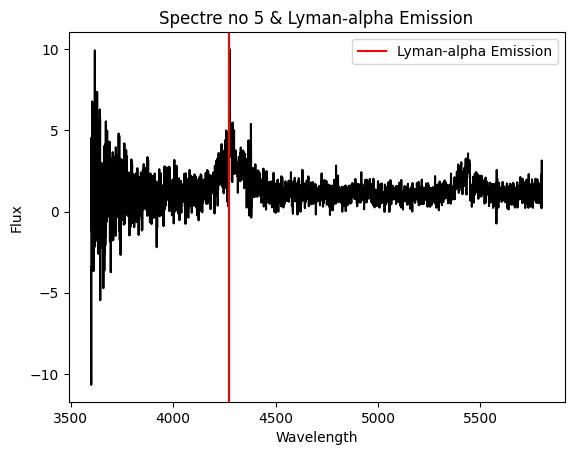

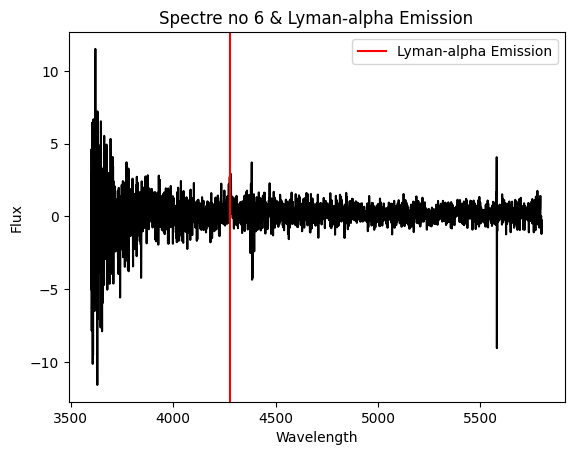

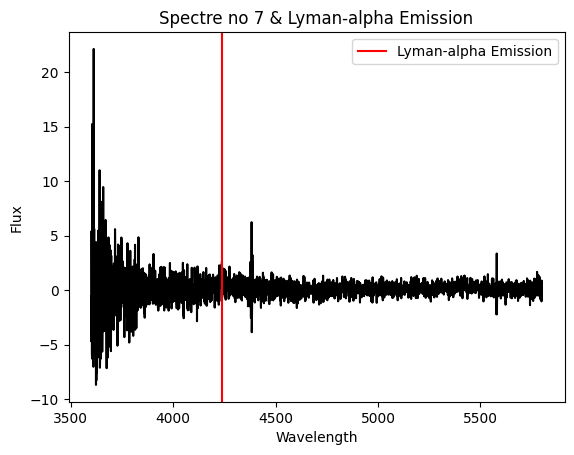

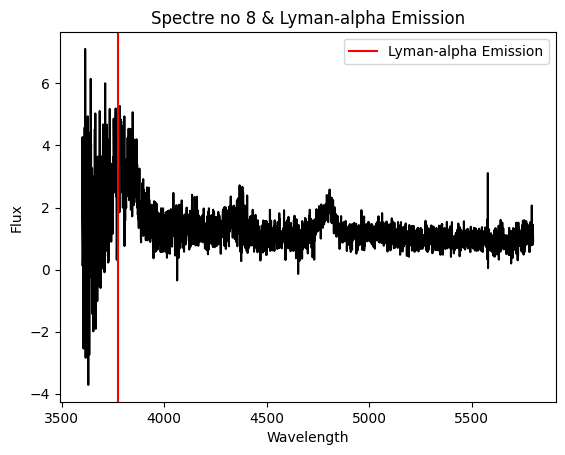

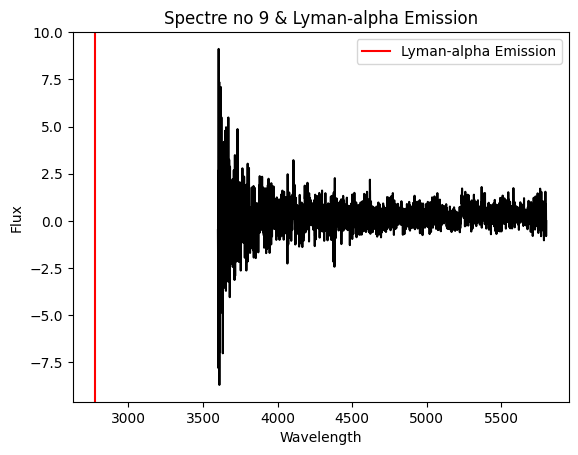

In [56]:
# Como podemos ver, tenemos una tabla solo con 57 elementos y la mayoria de
# spectype es del tipo QSO, por lo que ahora para un determinado TARGETID
# tenemos el corrimiento al rojo correspondiente del quasar

# Ahora veamos si es correcto, graficando la posicion de la Lyman-alpha
# emission para los primeros 10 elementos en el catalogo

lya = 1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z = zcat["Z"][i]
  indx = np.where(tids==tid)[0][0]
  plt.plot(bwave, bflux[indx], color='black')
  plt.axvline(1216*(1+z), color='r', label='Lyman-alpha Emission')
  plt.title(f"Spectre no {i} & Lyman-alpha Emission")
  plt.ylabel("Flux")
  plt.xlabel("Wavelength")
  plt.legend()
  plt.show()

In [ ]:
# Podemos ver que en la mayoria de los casos la linea roja, la cual es la
# posicion esperada para la Lyman-alpha emission encaja bien con la posicion
# donde se encuentra una linea de emision fuerte en los datos. Por lo que
# podemos decir de forma segura que estamos haciendo coincidr correctamente
# los espectro con el corrimiento al rojo del quasar.

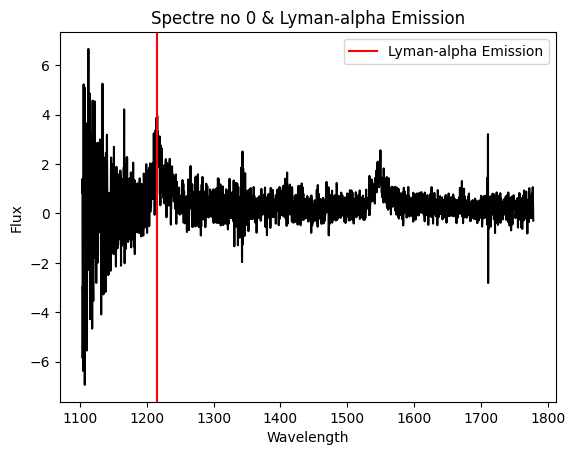

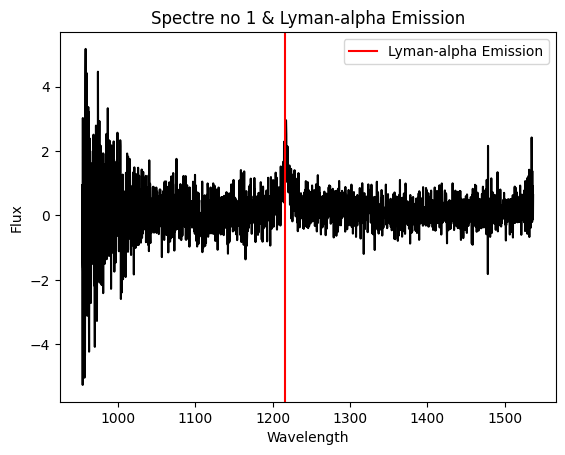

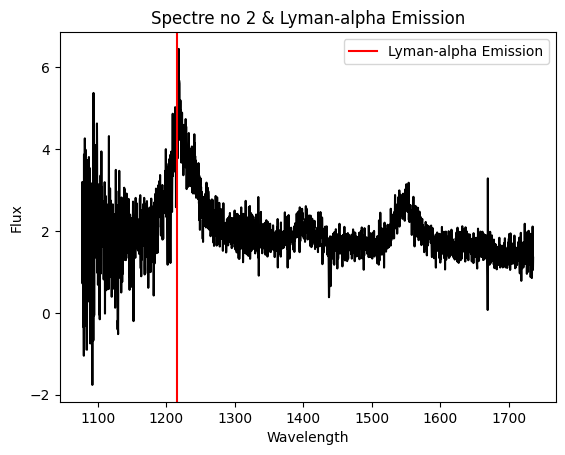

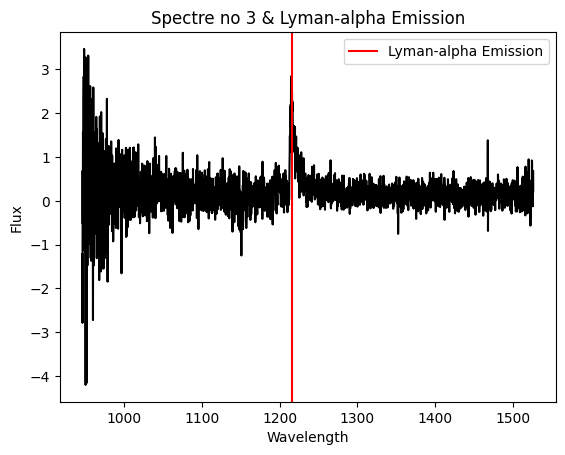

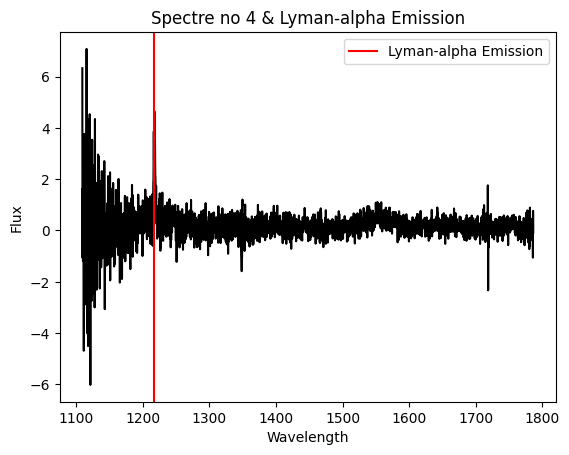

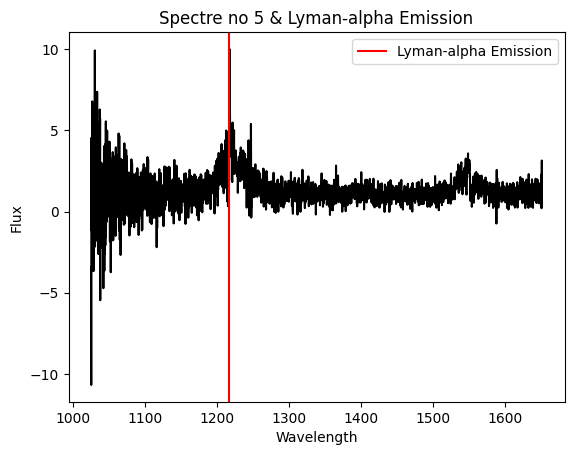

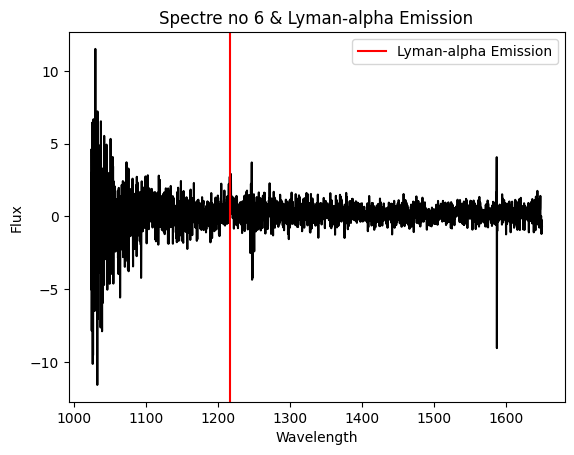

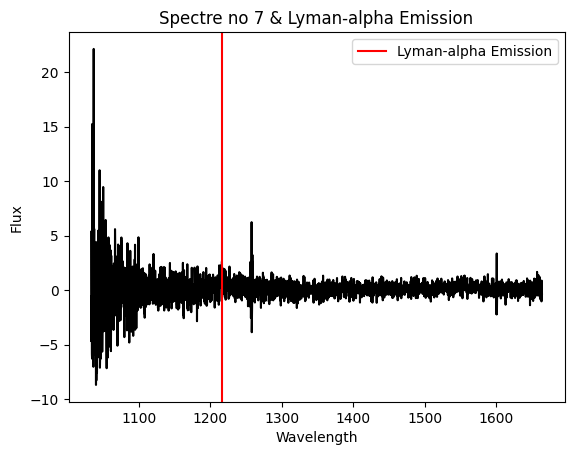

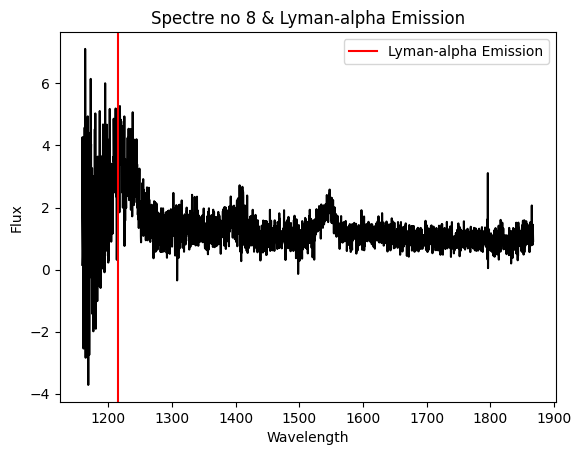

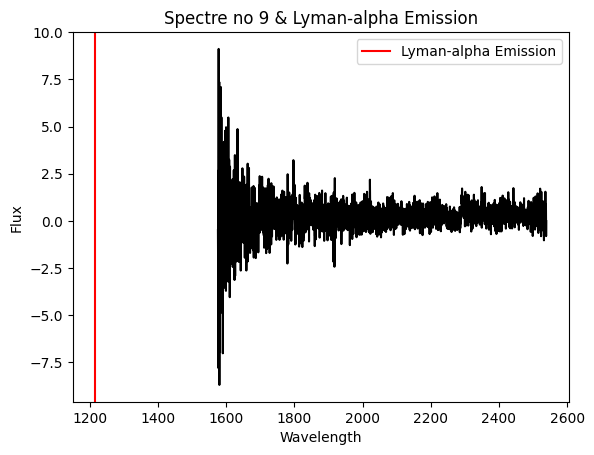

In [64]:
# Ahora podemos convertir nuestro espectro del observed frame al restframe
# Para hacer esto necesitamos convertir el array de wavelength para cada uno
# de los spectros para el observed frame utilizando el corrimiento al rojo.

# Nuevamente, aqui hay un ejemplo para los 10 primeros espectros

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx], color='black')
  plt.axvline(1216,color='red', label='Lyman-alpha Emission')
  plt.title(f"Spectre no {i} & Lyman-alpha Emission")
  plt.ylabel("Flux")
  plt.xlabel("Wavelength")
  plt.legend()
  plt.show()

Excersise: Now that you can convert the spectra to the rest frame, create a wavelength array in the rest frame that is common for all the spectra, and interpolate de spectra in such array. So that all your spectra have the same wavelenght array as before and you can apply now the PCA analysis.

In [61]:
# Computamos los componentes del PCA

# Podemos encontrar los eignevalores y eigenvectores de la siguiente forma
pca = PCA()
pca.fit(bflux)
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()

In [ ]:
# Siendo los eigenvalores
evals_cs

In [ ]:
# Y los egenvectores
evec = pca.components_
evec

In [54]:
# Para encontrar los coeficientes de un espectro particular
coeff = np.dot(evec, bflux[0] - bflux.mean(0))

array([ 1.25760718e+02, -5.09476704e+01,  2.43278063e+01,  5.10618074e+01,
       -1.39057461e+01, -3.72089716e+01,  1.09245002e+01,  2.57860284e+00,
       -1.07468270e+01, -1.98258643e+00, -1.13998517e+01,  9.38523511e-01,
        4.46429877e+00, -1.30799407e-01, -1.35196282e+00,  1.50080986e+00,
        3.23117500e+00,  6.37644495e-01, -6.73893128e-01,  7.58839772e-01,
       -1.14837622e+00, -7.56844168e-01, -4.92142264e-01,  4.05947511e-01,
       -1.61974243e+00, -5.27974851e-01, -3.11839051e-01,  8.45310047e-01,
       -9.02541746e-02, -1.41793514e+00, -6.47698381e-02,  7.22290078e-01,
       -4.58390784e-01,  5.36832035e-01,  1.48625520e-02, -4.84682181e-03,
       -2.79171720e-01,  1.14356923e+00,  8.60499793e-01, -3.84416661e-01,
        2.05289433e-01,  3.61460525e-01,  5.41292077e-01, -4.98883923e-01,
       -3.24708770e-01,  6.87615125e-02, -2.82603868e-01,  3.02372093e-01,
        6.87856139e-02, -2.30004783e-01,  2.87030603e-01, -1.44254543e-01,
       -6.73887597e-02,  

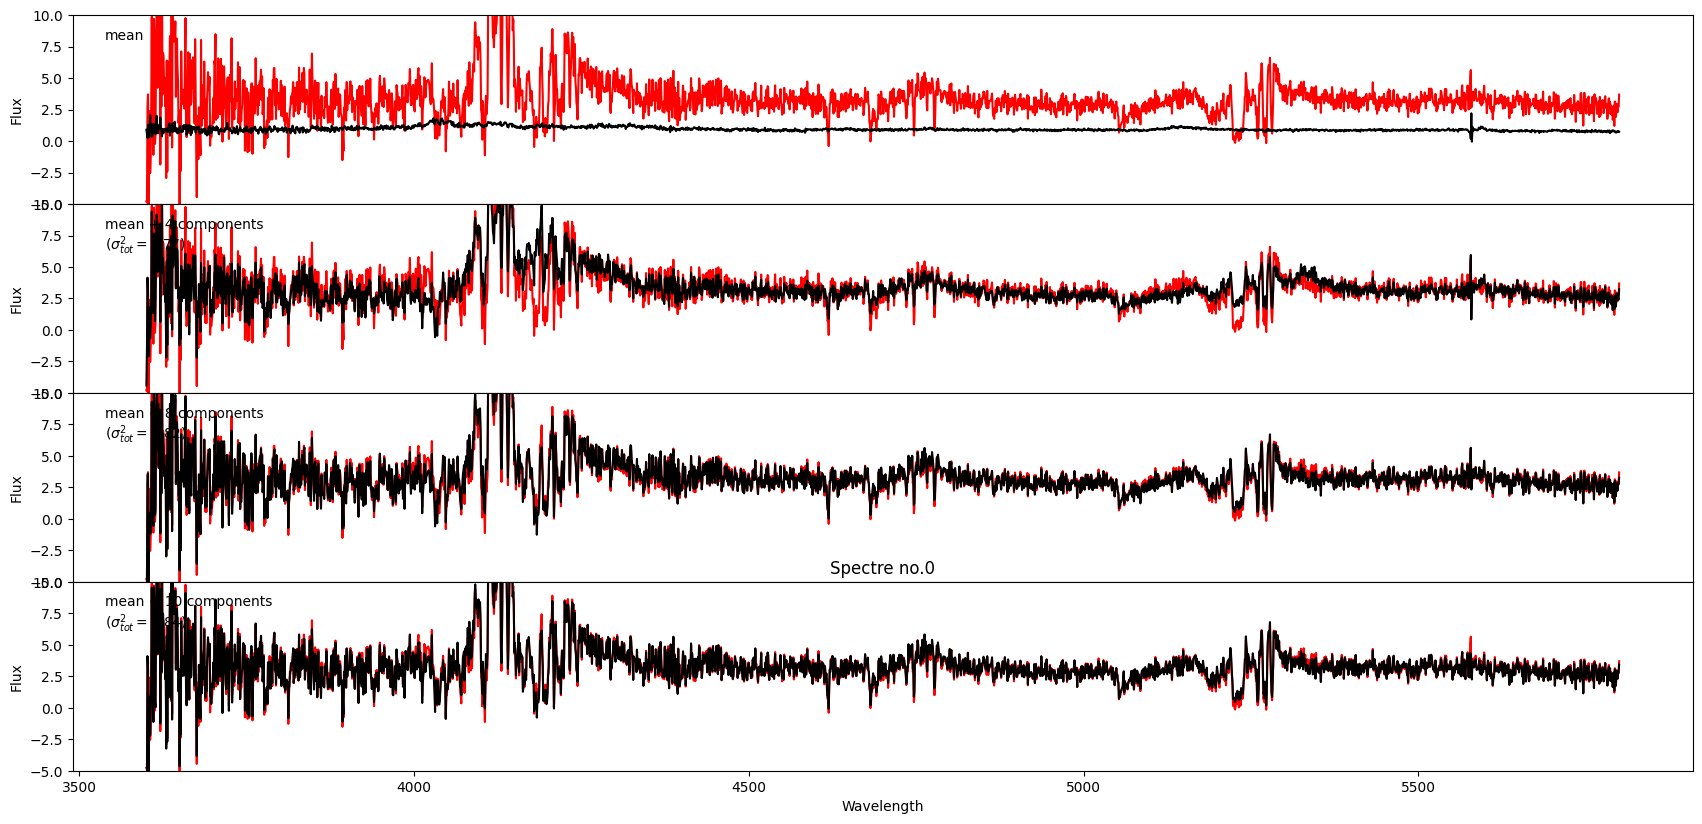

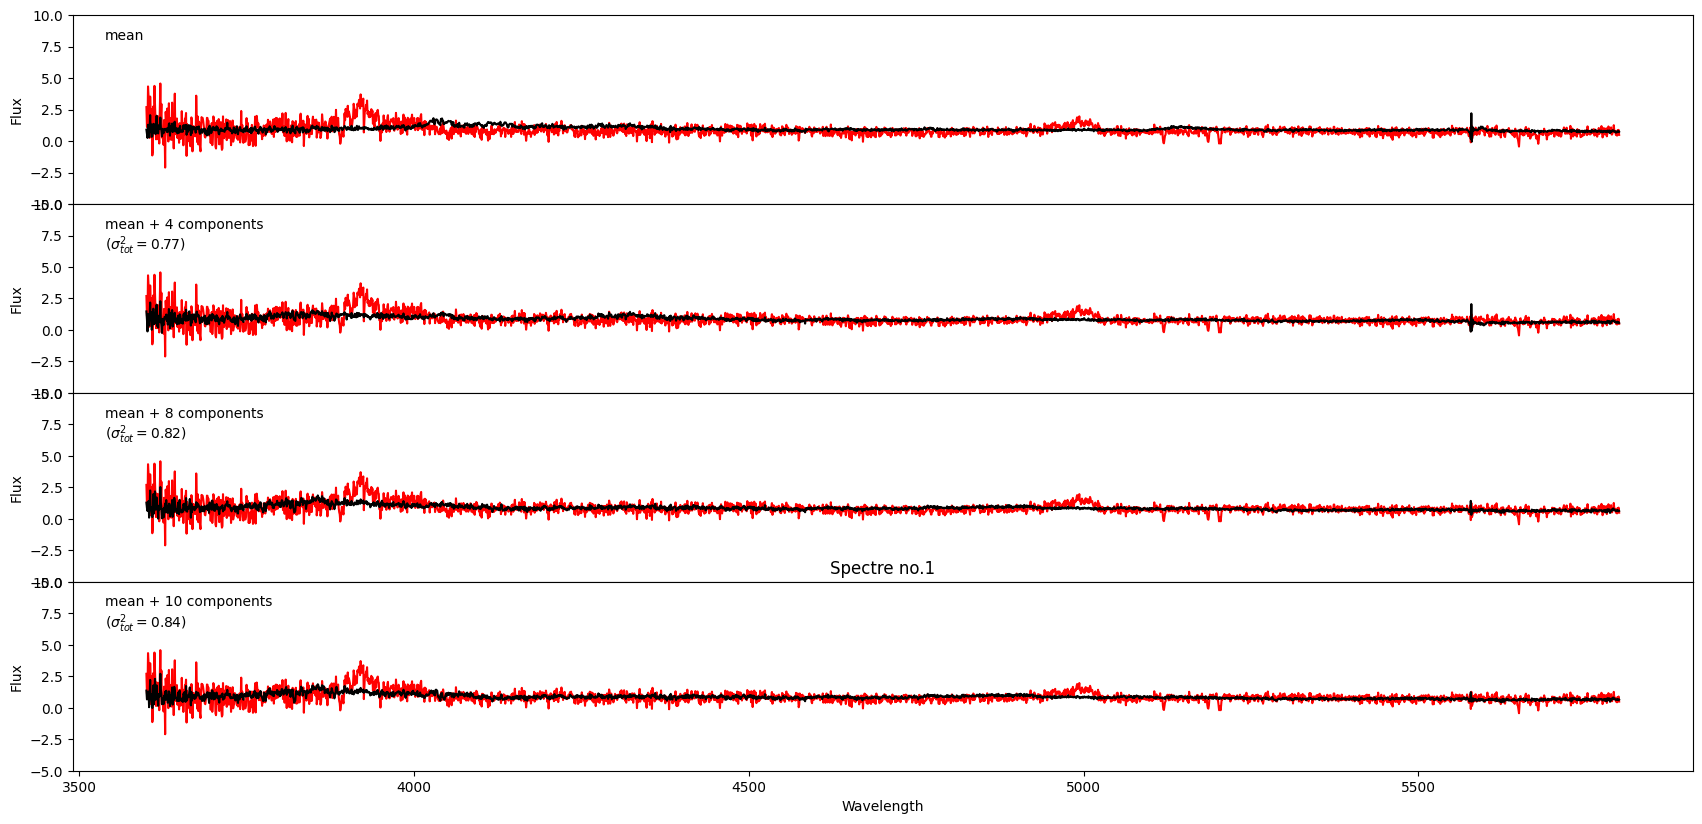

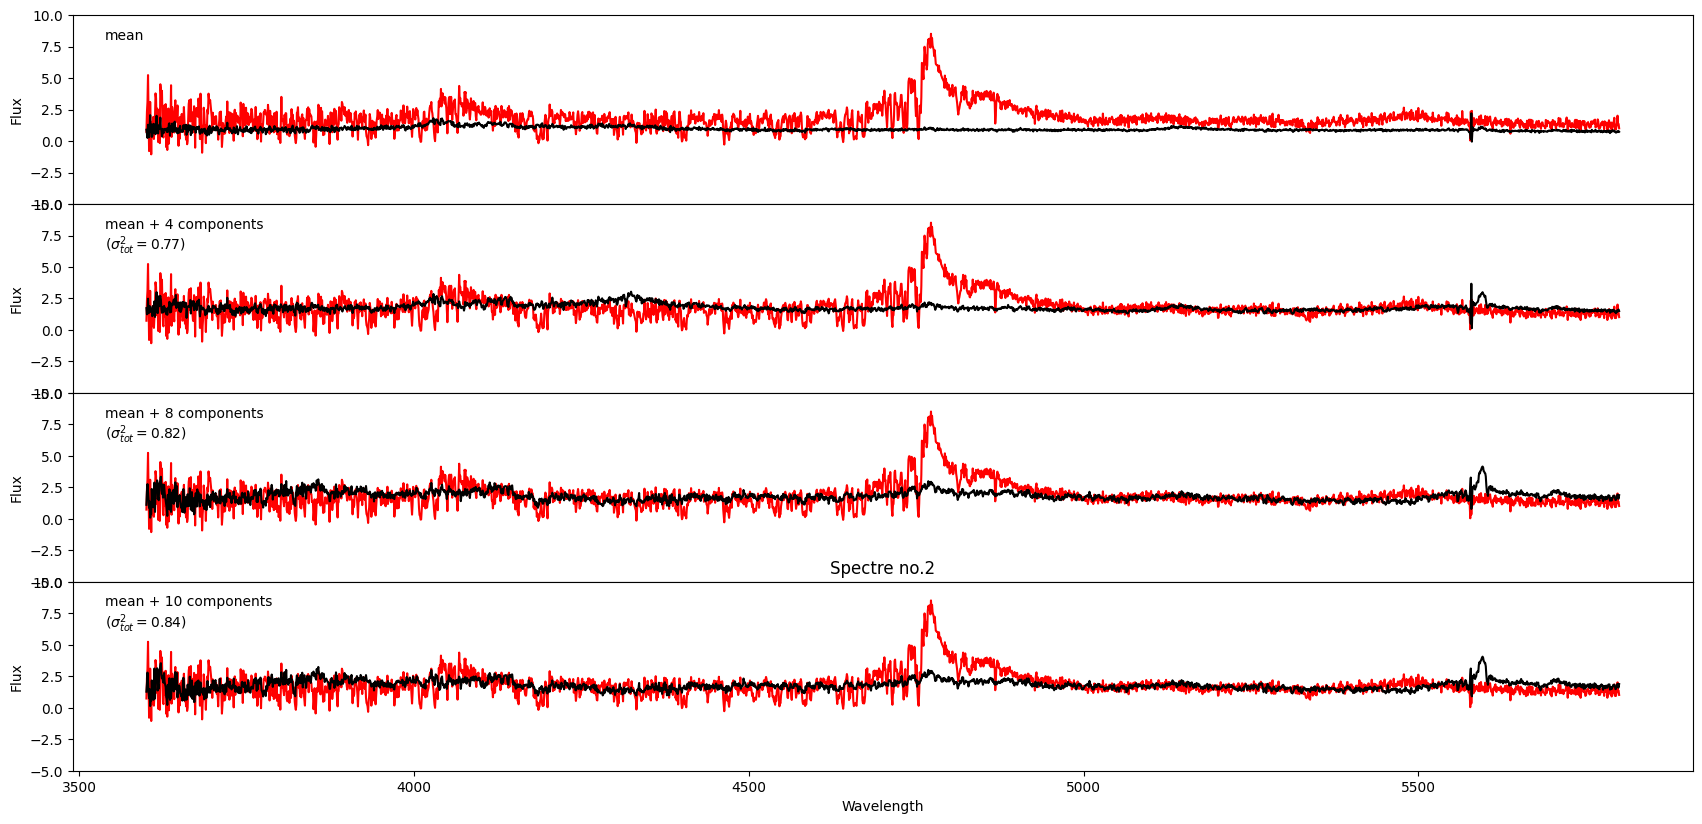

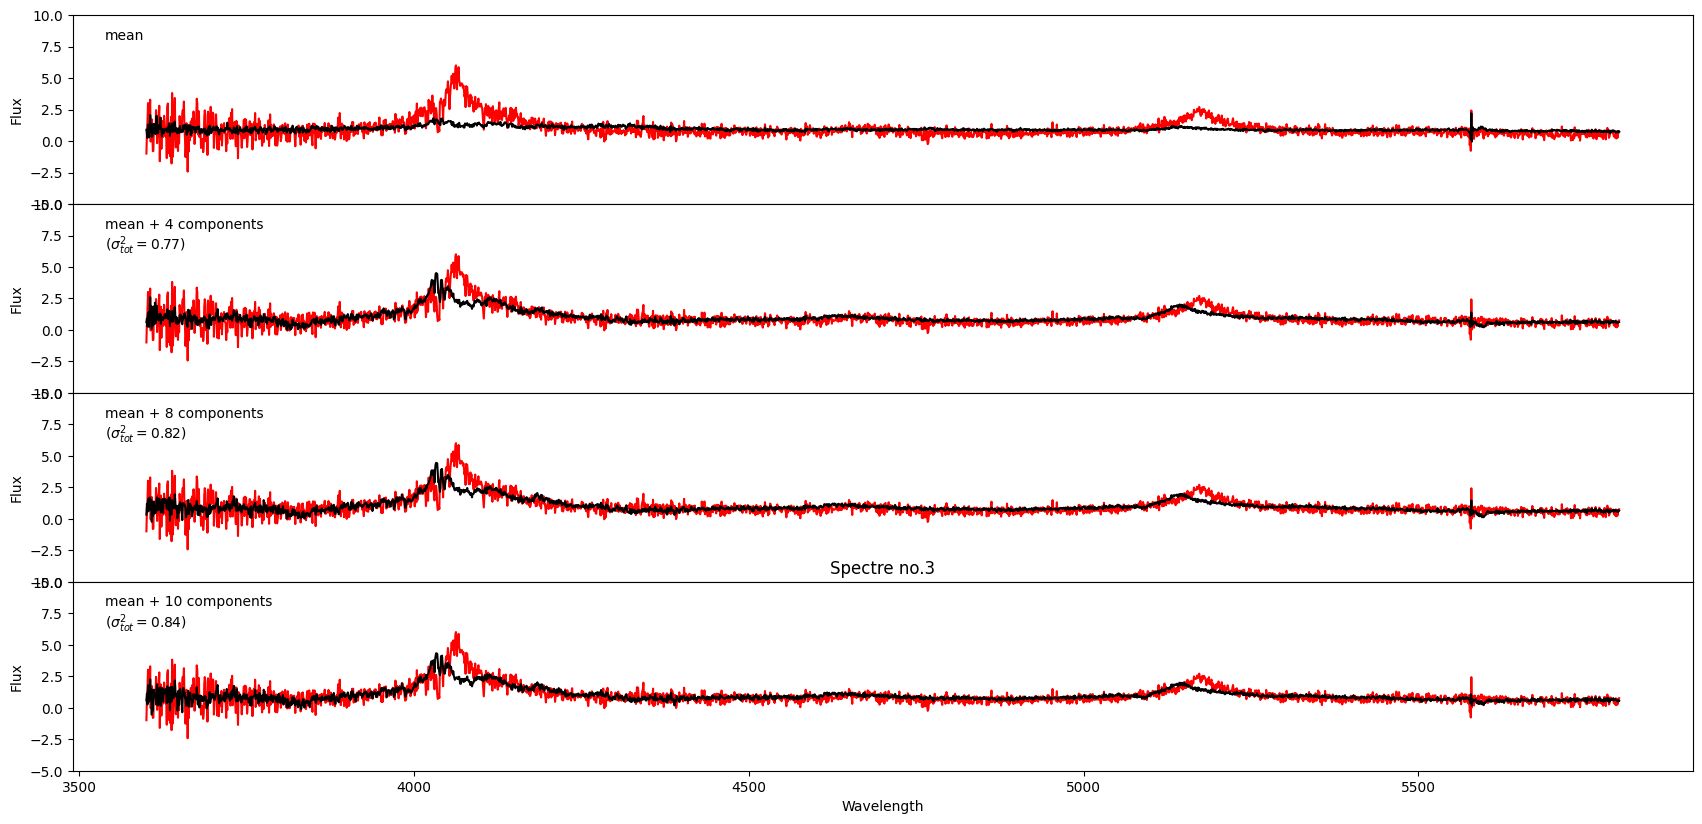

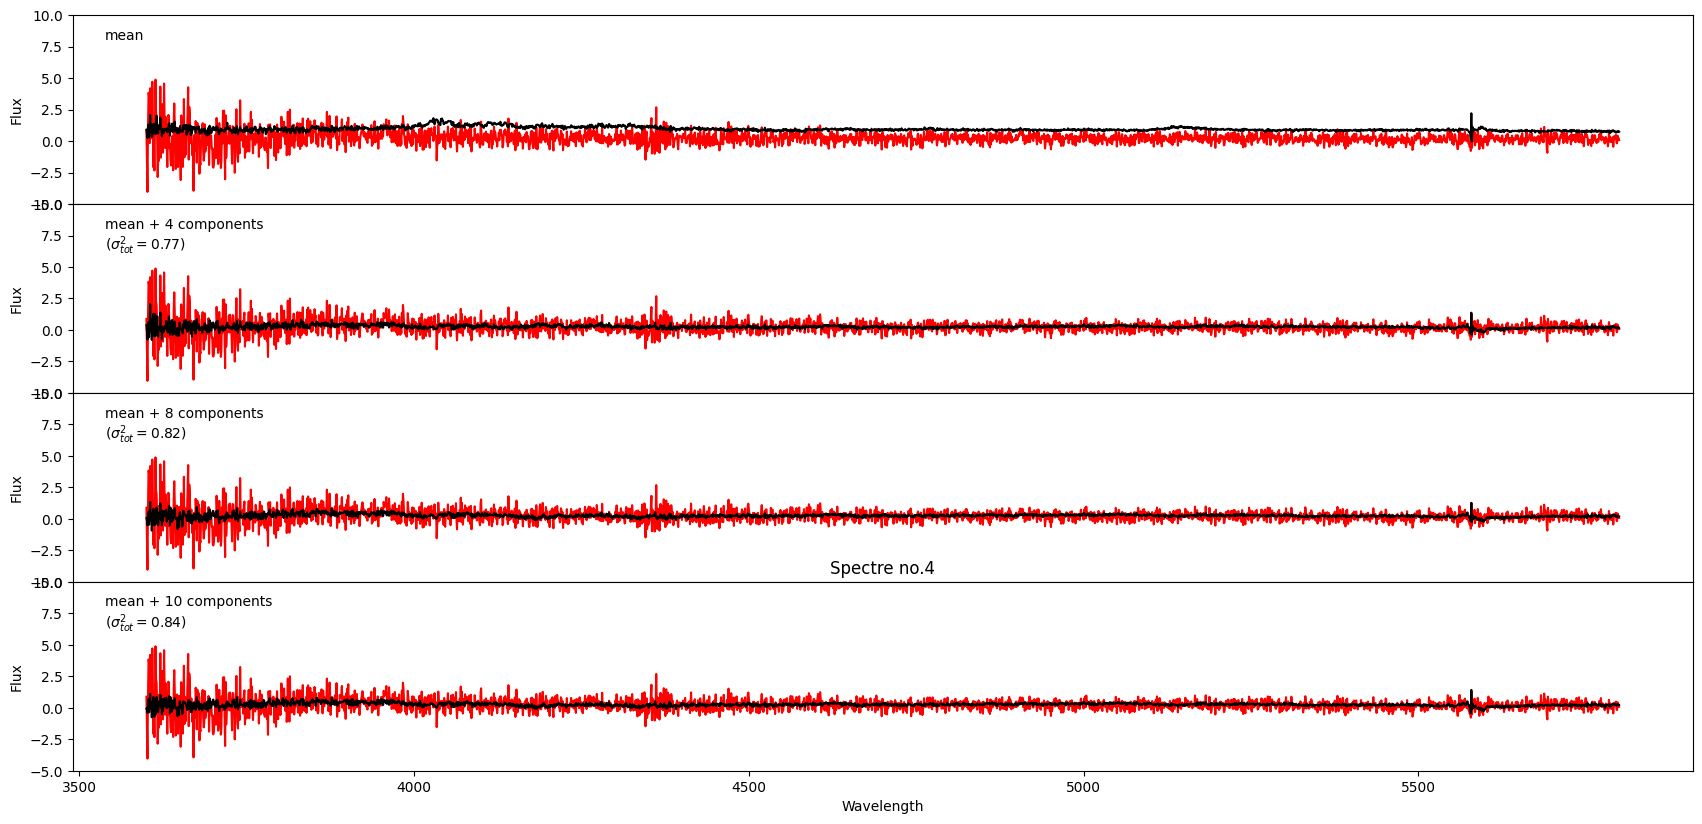

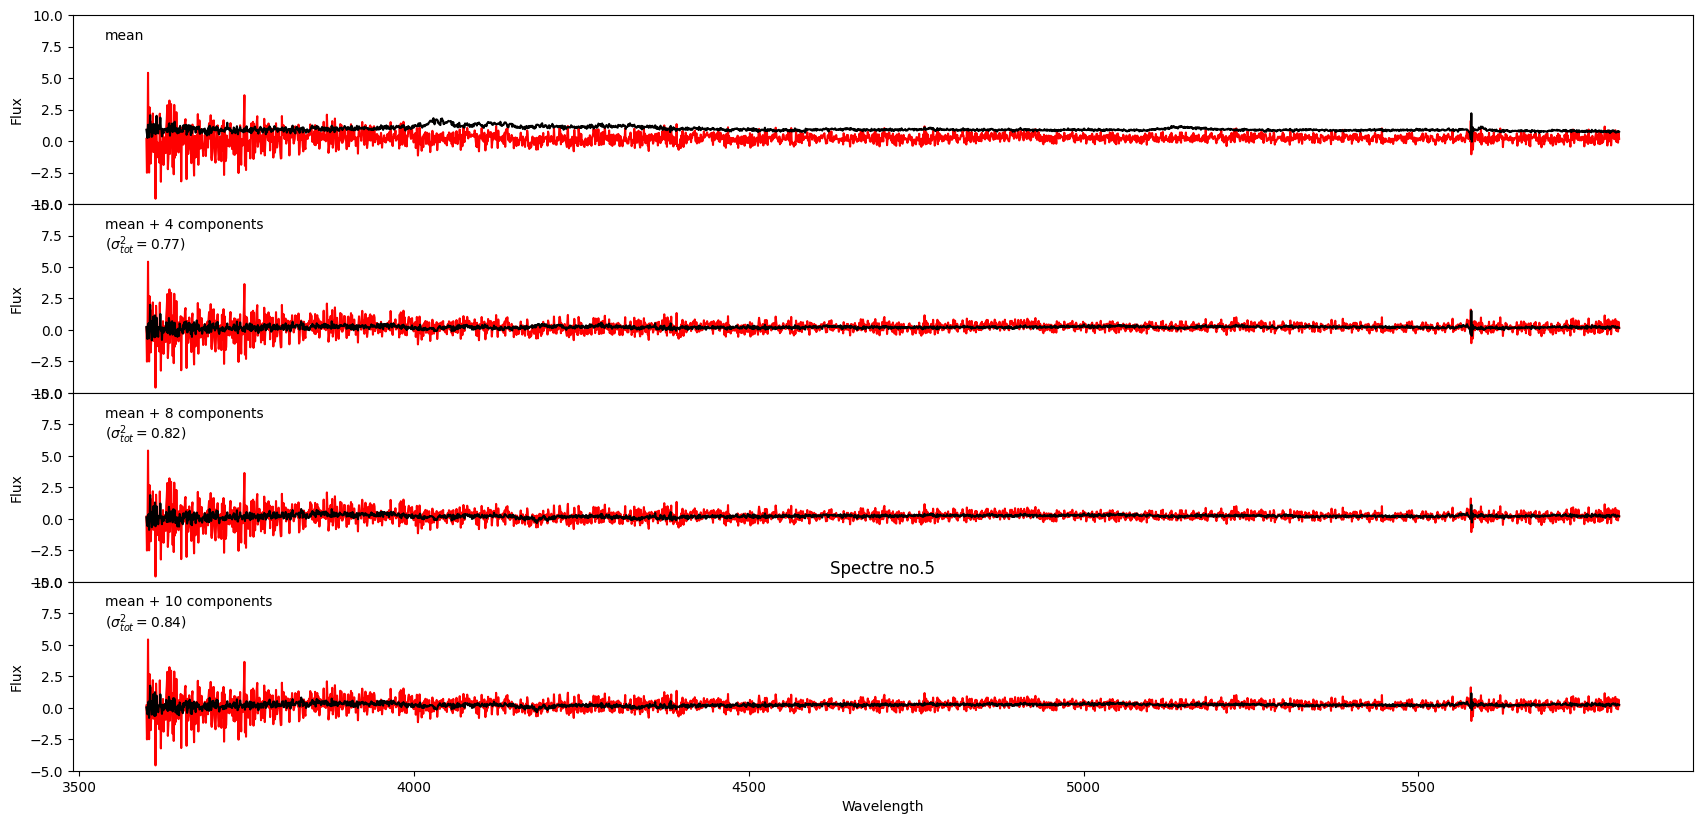

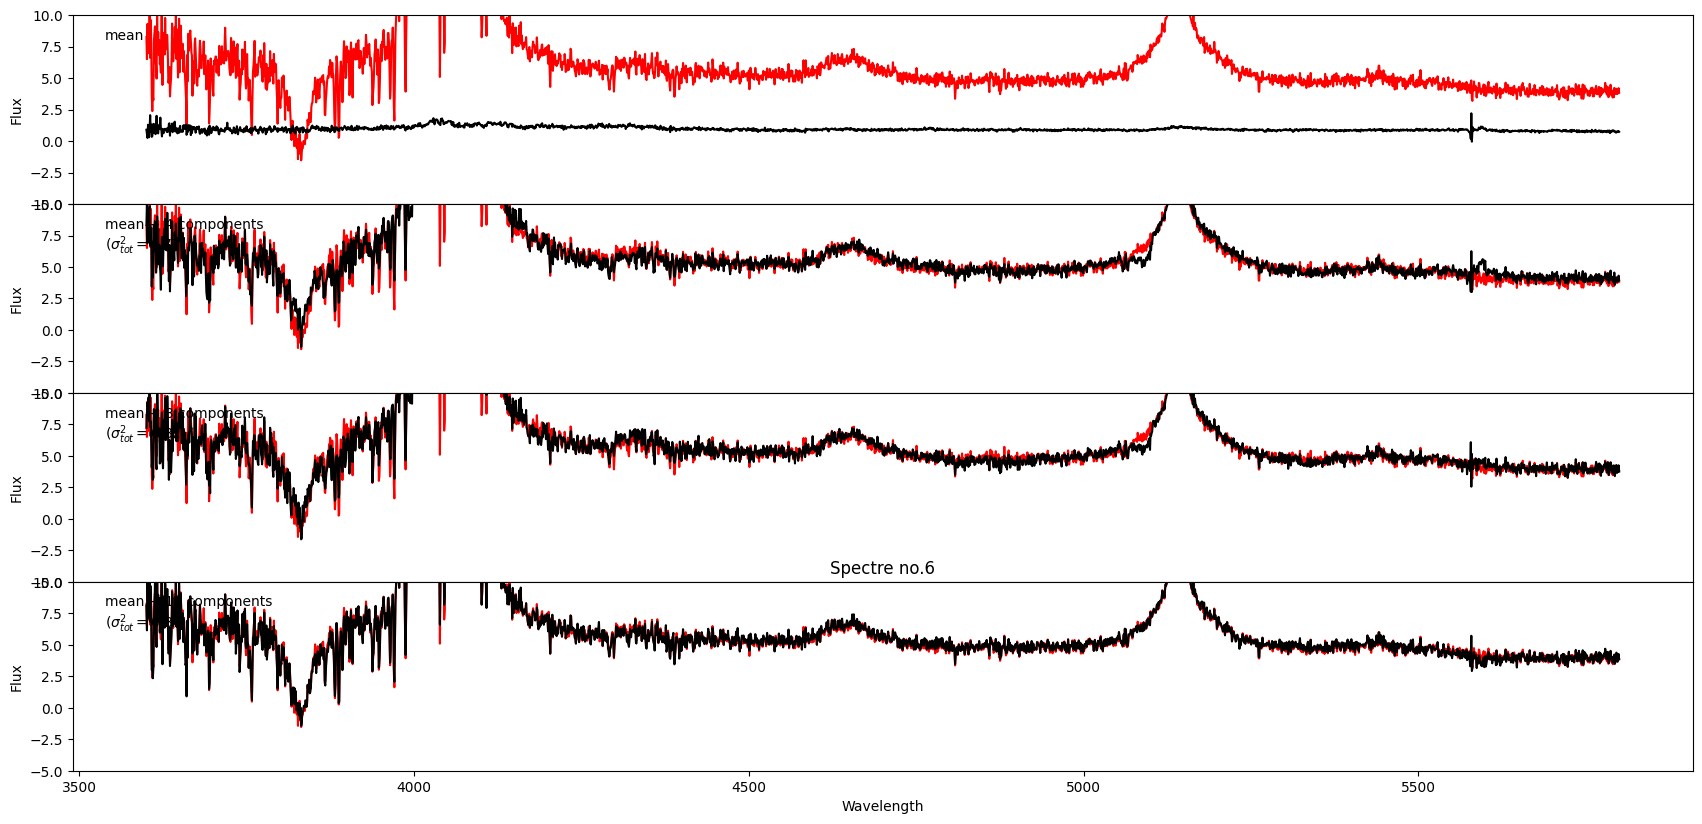

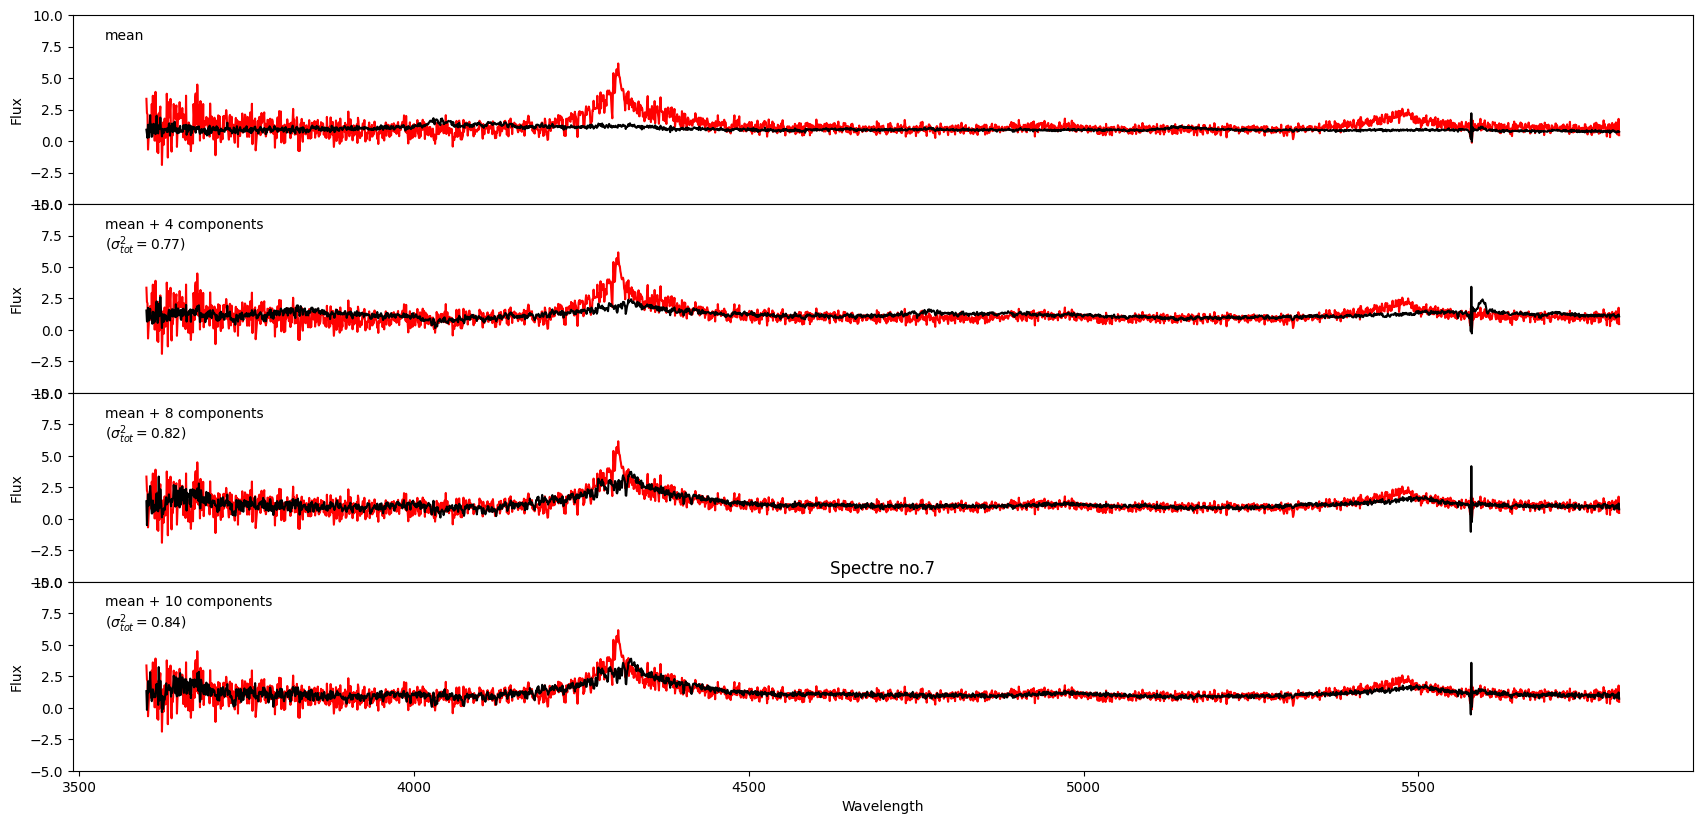

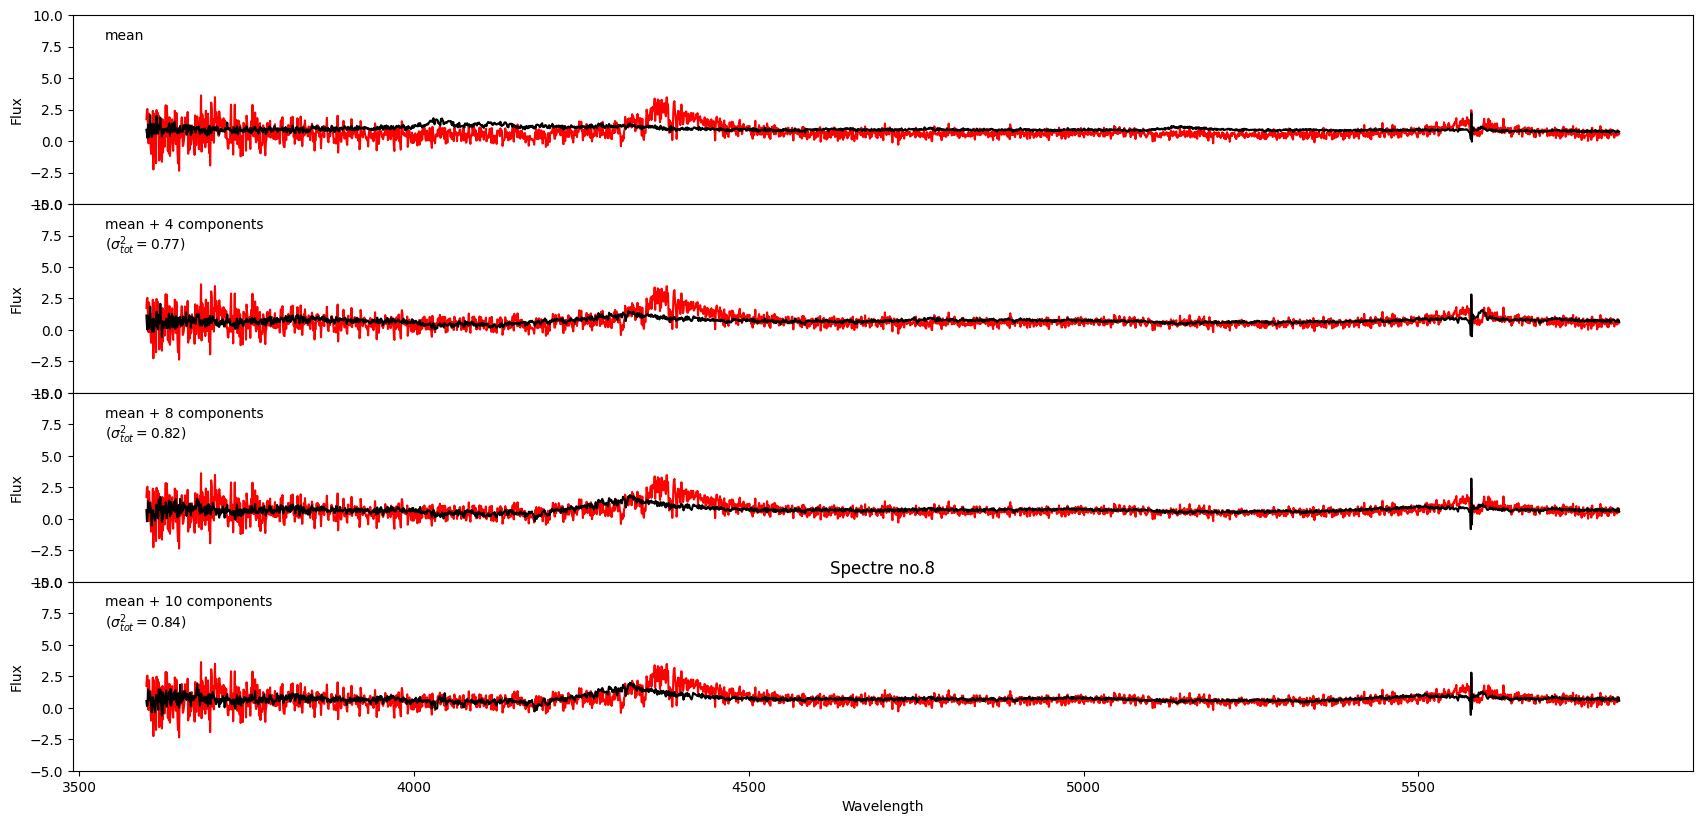

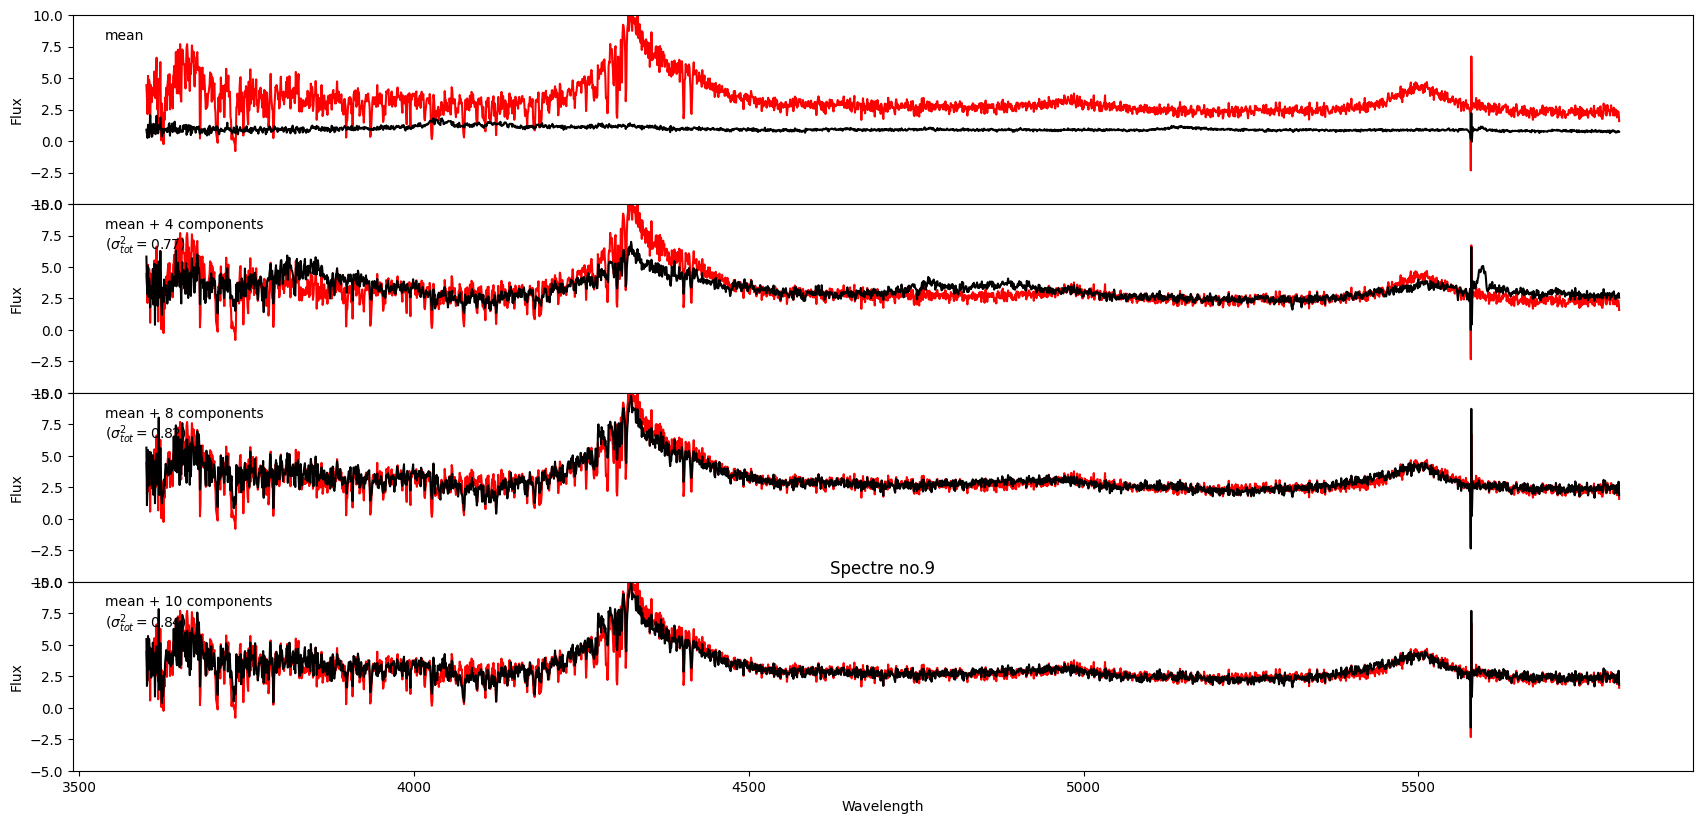

In [63]:
# Imprimimos los primeros 10 espectros reconstruidos
for k in range(10):
  # Calculamos los coeficientes para cada caso:
  coeff = np.dot(evec, bflux[k]-bflux.mean(0))
  fig = plt.figure(figsize=(20, 20))
  fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)
  for i, n in enumerate([0, 4, 8, 10]):
    ax = fig.add_subplot(911 + i)
    ax.plot(bwave,  bflux[k], '-', c='red')
    ax.plot(bwave, bflux.mean(0) + np.dot(coeff[:n], evec[:n]), '-k')
    ax.set_ylim(-5, 10)
    ax.set_ylabel('Flux')
    if i < 3:
       ax.xaxis.set_major_formatter(plt.NullFormatter())
    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)
  plt.title(f"Spectre no.{k}")
  fig.axes[-1].set_xlabel (r'Wavelength')
  plt.show()